In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("salary_data.csv")

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

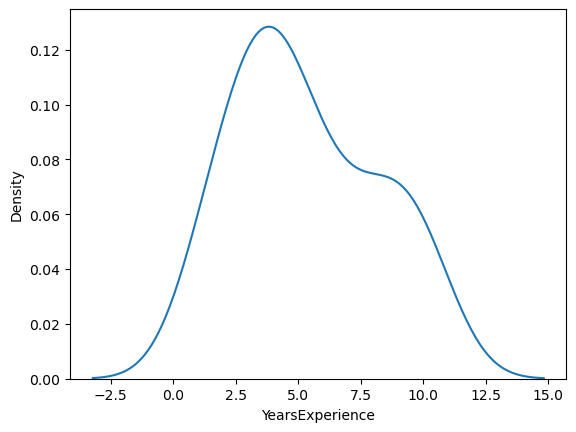

In [15]:
sns.kdeplot(data=df, x='YearsExperience');
plt.show()

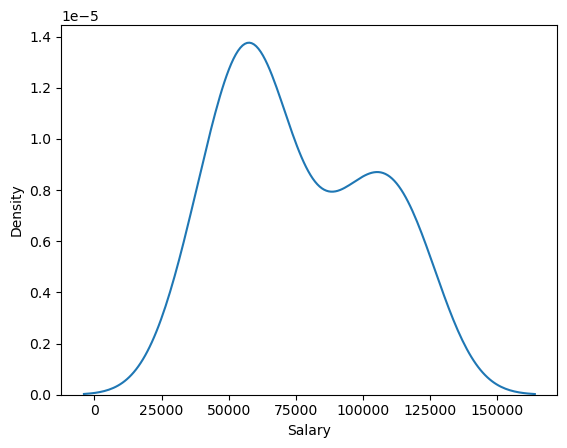

In [14]:
sns.kdeplot(data=df, x='Salary');
plt.show()

In [18]:
Correl=df.corr()

In [19]:
Correl

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Years of Experience and Salary are strongly correlated

## Visualization

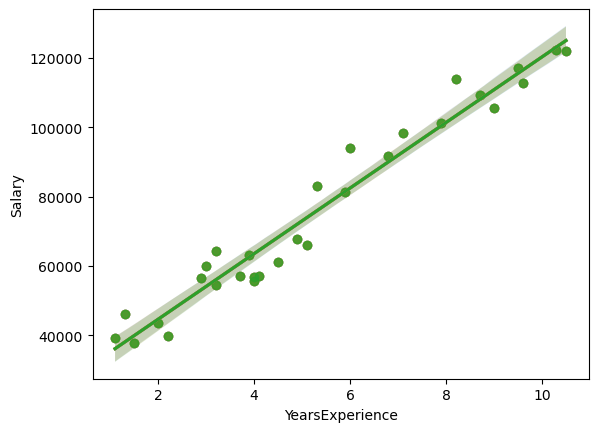

In [24]:
sns.regplot(x=df["YearsExperience"],y=df["Salary"])
plt.show()

## Model Building

In [26]:
import statsmodels.formula.api as smf

In [27]:
model=smf.ols("Salary~YearsExperience",data=df).fit()

## Model Validation

In [28]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [33]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [34]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## Model Prediction

In [35]:
Data1=pd.DataFrame({"YearsExperience":[40,50]})

In [36]:
Data1

,YearsExperience
0,40
1,50


In [37]:
model.predict(Data1)

0    403790.693057
1    498290.316271
dtype: float64